#Chapter2: Working with Text  


In [1]:
# para importar y  ver version de torch y tiktoken
from importlib.metadata import version
print("torch version:", version("torch"))
print("tiktoken version: ", version("tiktoken"))

torch version: 2.9.0+cu126
tiktoken version:  0.12.0


In [2]:
# impotar el texto  The veredict desde url
import os
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
       "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
       "the-verdict.txt")
file_path = "the-veredict.txt"
urllib.request.urlretrieve(url, file_path)

('the-veredict.txt', <http.client.HTTPMessage at 0x7fce465fe660>)

In [3]:
# Lectura breve del archivo usando python
with open(file_path, 'r', encoding='utf-8') as f:
    raw_text = f.read()

print("Numero total de caracteres: ", len(raw_text))
print("Primeros 100 caracteres: ", raw_text[:100])

Numero total de caracteres:  20479
Primeros 100 caracteres:  I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [4]:
import re
text = "Hello, world. This is a test."
result = re.split(r'(\s)', text) # separar por espacios
print(result)
result_2 = re.split(r'([,.]|\s)', text)  # separar por espacios, punto y comas
print(result_2)

['Hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.']
['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [5]:
# eliminar carater redundantes de manera segura como espacios en blanco
result_3 = [item for item in result_2 if item.strip()]
print(result_3)

['Hello', ',', 'world', '.', 'This', 'is', 'a', 'test', '.']


In [6]:
# para eleminar signos de pregunas, admiracion dobles espacios
text = "Hello, world. Is this-- a test?"
result_4 = re.split(r'([,.:;?_!"()\']|--|\s)', text)   # separar por espacios y punto y comas caracteres especiales
print(result_4)
result_5 = [item.strip() for item in result_4 if item.strip()]    # eliminar caracter redundantes de manera segura como espacios en blanco
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'Is', ' ', 'this', '--', '', ' ', 'a', ' ', 'test', '?', '']
['Hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.']


In [7]:
# Como trabajo un tokenizador basico
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()] # crea una tokenizadro a partir del texto
print(len(preprocessed))
print(preprocessed[:30])

4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [8]:
# Convertir token en ID´s (Vocabulary)
all_words = sorted(set(preprocessed))   # organiza la lista de la variable preprocessed alfabeticamente
vocab__size = len(all_words)
print(vocab__size)

1130


In [9]:
# Creado  el vocabulario
vocab = {token: integer for integer, token in enumerate(all_words)}        # recorrer la secuencia obteniendo al mismo tiempo el índice y el valor de cada elemento
for i, item in enumerate(vocab.items()):
  print(item)
  if i>=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [10]:
# Convertir numeros (ID) a texto mediante un tokenizador
# Tokenizador simple
class SimpleTokenizerV1:
  def __init__(self, vocab):                            # Constructor
     self.str_to_int = vocab                            # Almacena el vocabulario como un atributo de la clase para acceder a él en los métodos encode y decode.
     self.int_to_str = {i:s for s,i in vocab.items()}   # Crea un vocabulario inverso que mapea los IDs de tokens de vuelta a los tokens de texto originales.

  def encode(self,text):                                # Procesa el texto de entrada y lo convierte en identificadores de tokens.
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):                                  # Convierte tokenIDs  en texto
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'([,.:;?_!"()\']|--|\s)', r'\1', text) # Remueve los espacios despues de carateres especificos
    return text


Las implementaciones de tokenizadores comparten dos métodos comunes: un método encode y un método decode.
- El método encode recibe el texto de ejemplo, lo divide en tokens individuales y convierte esos tokens en IDs de tokens mediante el vocabulario.
- El método decode recibe los IDs de tokens, los convierte nuevamente en tokens de texto y concatena esos tokens en texto natural.

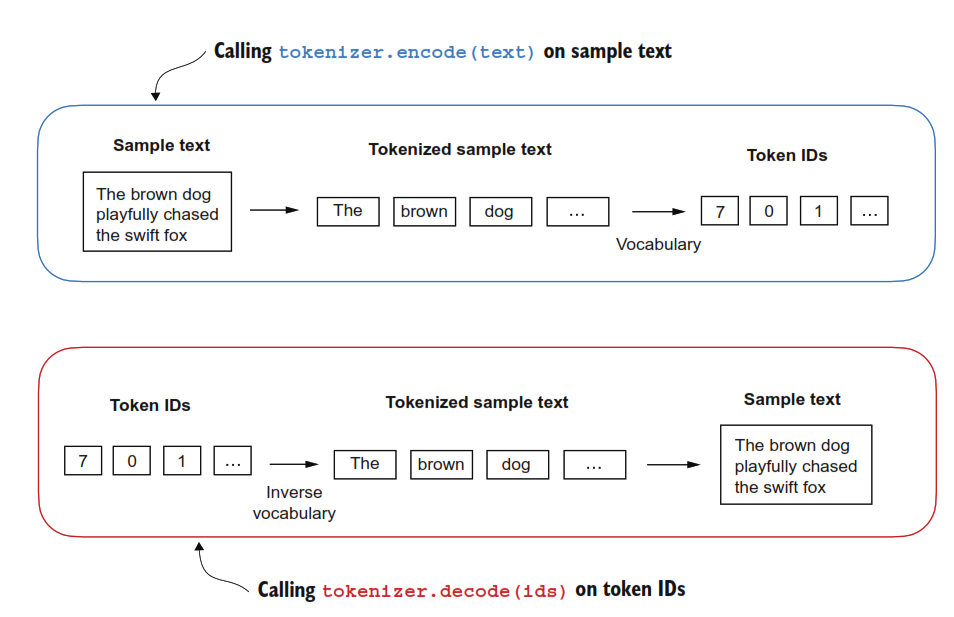

In [11]:
tokenizador = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
       Mrs. Gisburn said with pardonable pride.
"""
ids = tokenizador.encode(text)
print('---------------------------------')
print(ids)
print('---------------------------------')
print(tokenizador.decode(ids))

---------------------------------
[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
---------------------------------
" It ' s the last he painted , you know , " Mrs . Gisburn said with pardonable pride .


In [12]:
new_text = "Hello, do you like tea?"
print(tokenizador.encode(new_text))

KeyError: 'Hello'

El problema es que la palabra “Hello” no se utilizó en el cuento corto “The Verdict”. Por lo tanto, no está incluida en el vocabulario.

# 2.4 Añadiendo tokens de contexto especial

Necesitamos modificar el tokenizador para manejar palabras desconocidas. También debemos abordar el uso y la incorporación de tokens especiales de contexto que pueden mejorar la comprensión del modelo sobre el contexto u otra información relevante en el texto.
Estos tokens especiales pueden incluir marcadores para palabras desconocidas y límites de documentos, por ejemplo. En particular, modificaremos el vocabulario y el tokenizador, SimpleTokenizerV2, para que soporte dos nuevos tokens:
- <|unk|> → marcador para palabras desconocidas (unknown).
- <|endoftext|> → marcador para indicar el final del texto.


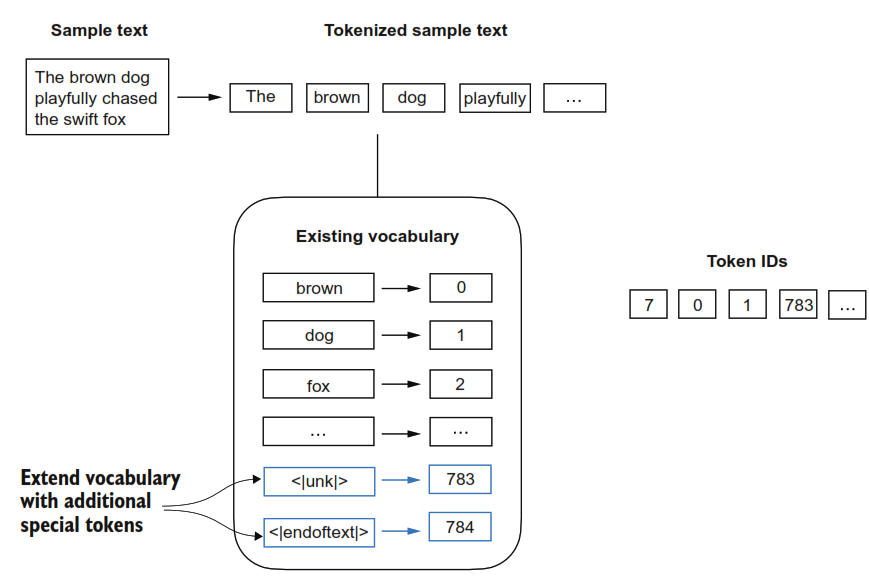



Agregamos tokens especiales a un vocabulario para manejar ciertos contextos. Por ejemplo, añadimos un token <|unk|> para representar palabras nuevas y desconocidas que no formaban parte de los datos de entrenamiento y, por lo tanto, no estaban en el vocabulario existente. Además, añadimos un token <|endoftext|> que podemos usar para separar dos fuentes de texto no relacionadas


In [17]:
# Mejorando el tokenizador para menajar palabras desconocidas que no
# hicieron parte del vocab <unknow> y para separar fuentes de texto diferentes
# <|endoftext|>

all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token: integer for integer, token in enumerate(all_tokens)}

print(len(vocab)) # imprime la cantida de token ahora con los dos tken nuevos

1132


Podemos modificar el tokenizador para que use un token <|unk|> si encuentra una palabra que no forma parte del vocabulario. Además, añadimos un token entre textos no relacionados.
Por ejemplo, cuando entrenamos LLMs tipo GPT con múltiples documentos o libros independientes, es común insertar un token antes de cada documento o libro que sigue a una fuente de texto anterior
Esto ayuda al LLM a comprender que, aunque estas fuentes de texto se concatenan para el entrenamiento, en realidad son no relacionadas.


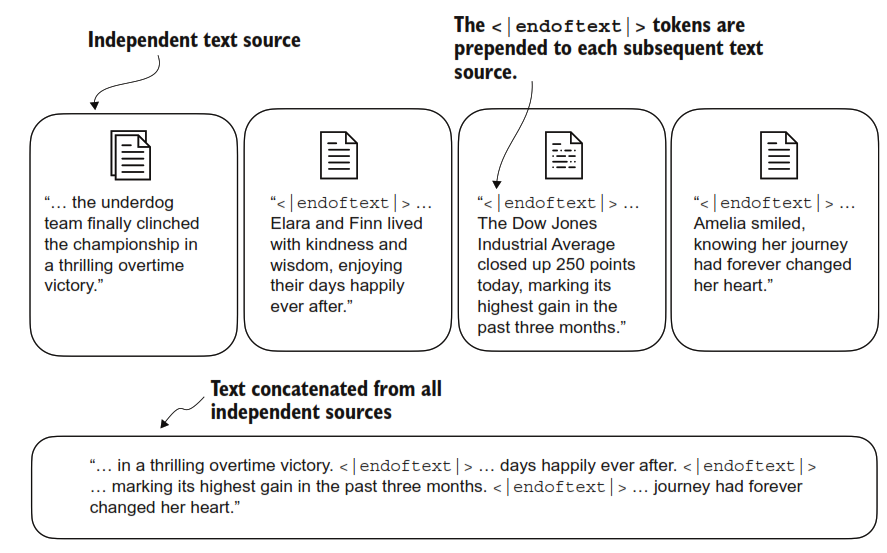

In [18]:
# Comprabnaod las nuevos tokens agregados
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [19]:
# Tokenizador para manejar palabras desconocidas

class SimpleTokenizerV2:
  def __init__(self, vocab):                    # constructor
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed =[item.strip() for item in preprocessed if item.strip()]
    # Reemplaza las palabras desconocidas por tokens <|unk|>
    preprocessed = [item if item in self.str_to_int else "<|unk>" for item in preprocessed]

    #ids = [self.str_to_int[s] for s in preprocessed], Produce error
    ids = [self.str_to_int.get(s, self.str_to_int["<|unk|>"]) for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.:;?!"()\]])', r'\1', text) # Reemplaza los espacios antes de los signos de puntuación especificados.
    return text


In [20]:
text_1 = "Hello, do you like tea?"
text_2 = "In the sunlit terraces of the palace"
text = " <|endoftext|> ".join((text_1, text_2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace


In [21]:
# Probando el nuevo tokenizador
tokenizador = SimpleTokenizerV2(vocab)
print('---------------------------------')
print(tokenizador.encode(text))


---------------------------------
[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131]


In [22]:
print('---------------------------------')
print(tokenizador.decode(tokenizador.encode(text)))

---------------------------------
<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>


Dependiendo del LLM, algunos investigadores también consideran tokens especiales adicionales, tales como:
- [BOS] (beginning of sequence) — Este token marca el inicio de un texto. Indica al LLM dónde comienza un contenido.
- [EOS] (end of sequence) — Este token se coloca al final de un texto y es especialmente útil al concatenar múltiples textos no relacionados, similar a <|endoftext|>. Por ejemplo, al combinar dos artículos de Wikipedia o libros diferentes, el token [EOS] señala dónde termina uno y comienza el siguiente.
- [PAD] (padding) — Al entrenar LLMs con tamaños de lote mayores a uno, el lote puede contener textos de longitudes variables. Para asegurar que todos los textos tengan la misma longitud, los textos más cortos se extienden o se “rellenan” usando el token [PAD], hasta alcanzar la longitud del texto más largo en el lote.
El tokenizador usado en los modelos GPT no necesita ninguno de estos tokens; solo utiliza un token <|endoftext|> por simplicidad. Este token es análogo al [EOS]. Además, <|endoftext|> también se usa para padding. Sin embargo, como veremos en capítulos posteriores, cuando se entrena con entradas en lotes, normalmente se utiliza una máscara, lo que significa que no se atiende a los tokens de relleno. Por lo tanto, el token específico elegido para el relleno se vuelve irrelevante.
Además, el tokenizador usado en los modelos GPT tampoco utiliza un token <|unk|> para palabras fuera del vocabulario. En su lugar, los modelos GPT emplean un tokenizador de codificación por pares de bytes (BPE), que descompone las palabras en unidades subléxicas,


# 2.5 Byte per encoding BPE


Veamos un esquema de tokenización más sofisticado basado en un concepto llamado codificación por pares de bytes (BPE). El tokenizador BPE se utilizó para entrenar LLMs como GPT-2, GPT-3 y el modelo original usado en ChatGPT.

ennlace a video que lo explica un poco mejor:

[ Video BPE](https://www.youtube.com/watch?v=HEikzVL-lZU)

https://www.youtube.com/watch?v=HEikzVL-lZU


In [23]:
!pip install tiktoken

In [24]:
from importlib.metadata import version
print("torch version:", version("torch"))
print("tiktoken version: ", version("tiktoken"))

torch version: 2.9.0+cu126
tiktoken version:  0.12.0


In [25]:
# Se instancia BPE tokenizer desde tiktoken
import tiktoken
tokenizador = tiktoken.get_encoding("gpt2")

In [26]:
# Convertri texto a IDs con BPE
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

tokenizador.encode(text, allowed_special={"<|endoftext|>"})
integers = tokenizador.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [27]:
# Convertir IDs en texto con BPE
strings = tokenizador.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [28]:
# Ejercicio 2.1
texto = "Akwirw ier"
integer=tokenizador.encode(texto)
print(integer)

[33901, 86, 343, 86, 220, 959]


In [29]:
# Ejercicio 2.1
cadena=tokenizador.decode(integer)
print(cadena)

Akwirw ier


In [30]:
# Ejercicio 2.1 con tokenizador especcial
texto = "Akwirw ier. <|endoftext|> New word"
integer=tokenizador.encode(texto, allowed_special={"<|endoftext|>"})
print(integer)

[33901, 86, 343, 86, 220, 959, 13, 220, 50256, 968, 1573]


In [31]:
# Ejercicio 2.1
cadena=tokenizador.decode(integer)
print(cadena)

Akwirw ier. <|endoftext|> New word


# 2.6 Data sampling with a sliding window

In [32]:
"""
se obtiene 5145, que corresponde al número total de tokens en el
conjunto de entrenamiento después
de aplicar el tokenizador BPE
"""
with  open(file_path, 'r', encoding='utf-8') as f:
  raw_text = f.read()

enc_text = tokenizador.encode(raw_text)
print(len(enc_text))

5145


In [33]:
enc_sample = enc_text[50:]
print(enc_sample)

[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 351, 10

In [34]:
# Creando variables de pares entrada–objetivo
"""variables, X y Y, donde X contiene los tokens de
entrada y Y contiene los objetivos,
que son las entradas desplazadas en 1
"""
context_size = 4
X = enc_sample[:context_size]
Y = enc_sample[1:context_size+1]
print(f'X: {X}')
print(f'Y:      {Y}')

X: [290, 4920, 2241, 287]
Y:      [4920, 2241, 287, 257]


In [35]:
# procesando las entradas a largo de los objetivos
for i in range(1, context_size+1):
  context = enc_sample[:i]
  disered = enc_sample[i]
  print(f' X context:{context},--------> Y desired: {disered}')

 X context:[290],--------> Y desired: 4920
 X context:[290, 4920],--------> Y desired: 2241
 X context:[290, 4920, 2241],--------> Y desired: 287
 X context:[290, 4920, 2241, 287],--------> Y desired: 257


In [36]:
#
for i in range(1, context_size+1):
  context = enc_sample[:i]
  disered = enc_sample[i]
  print(f' X context:{tokenizador.decode(context)},--------> Y desired: {tokenizador.decode([disered])}')

 X context: and,--------> Y desired:  established
 X context: and established,--------> Y desired:  himself
 X context: and established himself,--------> Y desired:  in
 X context: and established himself in,--------> Y desired:  a


In [37]:
# Un conjunto de datos para entradas y objetivos en lotes
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self, txt, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    tokens_ids = tokenizer.encode(txt)   # Tokeniza enteros a texto
    for i in range(0, len(tokens_ids)-max_length, stride):  # Utiliza una ventana deslizante para dividir el libro en secuencias superpuestas de longitud máxima
      input_chunk = tokens_ids[i:i+max_length]
      target_chunk = tokens_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)    # Regresa el total el numero de filas en el dataset

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]  # Regresa una fila del dataset




In [38]:
# A data loader to generate batches with input-with pairs
def create_data_loader_v1(txt, batch_size=4,max_length=256, stride=128,
                         shuffle=True, drop_last=True, num_workers=0):
  tokenizer = tiktoken.get_encoding("gpt2")
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)          # crea el dataset
  dataloader= DataLoader(dataset,
                         batch_size=batch_size,
                         shuffle=shuffle,
                         drop_last=drop_last,             # descarta el último lote si es más pequeño que el lote especificado,evita picos de pérdida durante el entrenamiento.
                         num_workers=num_workers)         # El número de procesos de CPU que se utilizarán
  return dataloader


In [44]:
with open(file_path, 'r', encoding='utf-8') as f:
  raw_text = f.read()

dataloader = create_data_loader_v1(raw_text, batch_size=4, stride=1,shuffle=False)
data_iter=iter(dataloader)
first_batch = next(data_iter)           # Convierte el dataloader en un iterador de Python para obtener la siguiente entrada mediante la función incorporada next() de Python.
print(first_batch)


[tensor([[   40,   367,  2885,  ...,   198,  5779, 28112],
        [  367,  2885,  1464,  ...,  5779, 28112, 10197],
        [ 2885,  1464,  1807,  ..., 28112, 10197,   832],
        [ 1464,  1807,  3619,  ..., 10197,   832,   262]]), tensor([[  367,  2885,  1464,  ...,  5779, 28112, 10197],
        [ 2885,  1464,  1807,  ..., 28112, 10197,   832],
        [ 1464,  1807,  3619,  ..., 10197,   832,   262],
        [ 1807,  3619,   402,  ...,   832,   262, 46475]])]


In [45]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 1807,  3619,   402,  ...,   832,   262, 46475],
        [ 3619,   402,   271,  ...,   262, 46475,   286],
        [  402,   271, 10899,  ..., 46475,   286, 18113],
        [  271, 10899,  2138,  ...,   286, 18113,   544]]), tensor([[ 3619,   402,   271,  ...,   262, 46475,   286],
        [  402,   271, 10899,  ..., 46475,   286, 18113],
        [  271, 10899,  2138,  ...,   286, 18113,   544],
        [10899,  2138,   257,  ..., 18113,   544,   338]])]


In [46]:
# ejercicio 2.2-1
dataloader = create_data_loader_v1(raw_text, max_length=2, batch_size=4, stride=2,shuffle=False)
data_iter=iter(dataloader)
first_batch_exer_1 = next(data_iter)
print(first_batch_exer_1)

[tensor([[  40,  367],
        [2885, 1464],
        [1807, 3619],
        [ 402,  271]]), tensor([[  367,  2885],
        [ 1464,  1807],
        [ 3619,   402],
        [  271, 10899]])]


In [48]:
# ejercicio 2.2-2
dataloader = create_data_loader_v1(raw_text, max_length=2, batch_size=4, stride=2,shuffle=False)
data_iter=iter(dataloader)
first_batch_exer_2 = next(data_iter)
print(first_batch_exer_2)

[tensor([[  40,  367],
        [2885, 1464],
        [1807, 3619],
        [ 402,  271]]), tensor([[  367,  2885],
        [ 1464,  1807],
        [ 3619,   402],
        [  271, 10899]])]


In [49]:
dataloader = create_data_loader_v1(
    raw_text, batch_size=8, max_length=4, stride=4,
    shuffle=False
)

data_iter=iter(dataloader)
inputs, targets=next(data_iter)
print("Inputs: \n ", inputs)
print("\n Targets: \n ", targets)

Inputs: 
  tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

 Targets: 
  tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


# 2.7 Creando token de embeddings

El último paso en la preparación del texto de entrada para el entrenamiento de un LLM es convertir los IDs de tokens en vectores de embeddings

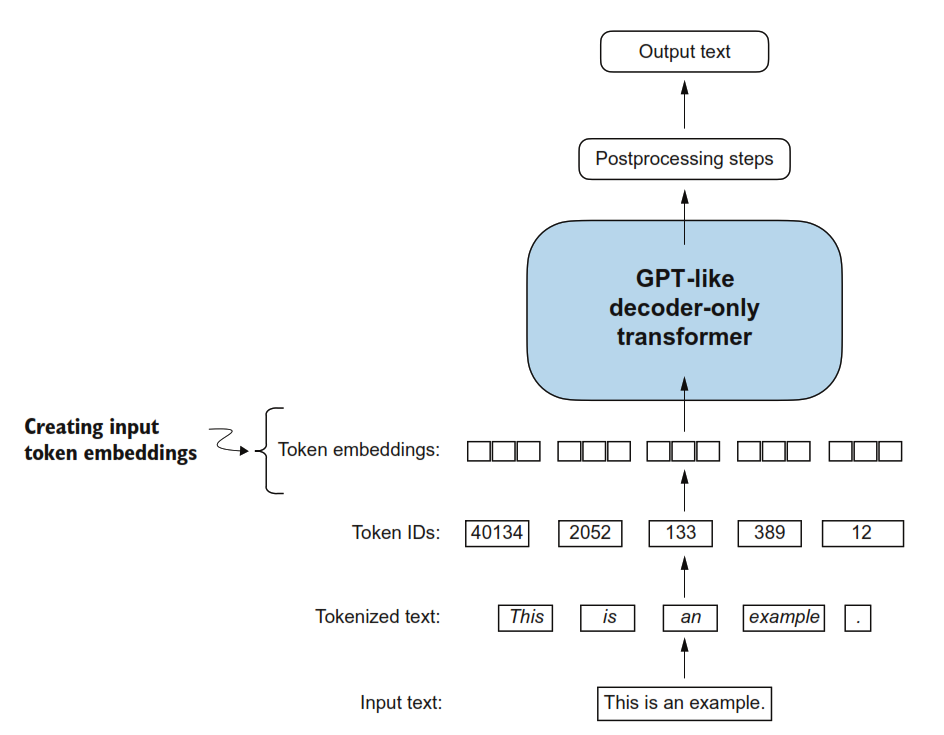

La preparación implica tokenizar el texto, convertir los tokens de texto en IDs de tokens y convertir los IDs de tokens en vectores de embeddings.


In [52]:
inputs_id=torch.tensor([2,3,5,1])
vocab_size=6              # vocabulario pequeño de solo 6 palabras
output_dim=3              # embeddings de tamaño 3

torch.manual_seed(123)    # semilla aleatoria en 123, obtneer la misma secuencia de números aleatorios cada vez que ejecutes el programa.
embedding_layer=torch.nn.Embedding(vocab_size,output_dim)
print(embedding_layer)
print('---------------------')
print(embedding_layer.weight)
print('---------------------')

Embedding(6, 3)
---------------------
Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
---------------------


In [54]:
# Obtner el vector de embedding
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


# 2.8 Codificar palabras de position

una pequeña limitación de los LLMs es que su mecanismo de autoatención  no tiene noción de posición ni de orden para los tokens dentro de una secuencia. La forma en que funciona la capa de embedding presentada anteriormente es que el mismo ID de token siempre se asigna a la misma representación vectorial, independientemente de dónde esté posicionado el ID de token en la secuencia de entrada.

El embedding determinista e independiente de la posición del ID de token es útil para fines de reproducibilidad. Sin embargo, dado que el mecanismo de autoatención de los LLMs también es independiente de la posición, resulta conveniente inyectar información adicional sobre la posición en el LLM.

podemos usar dos categorías generales de embeddings sensibles a la posición:
- Embeddings posicionales relativos: posición relativa o distancia entre tokens. Esto significa que el modelo aprende las relaciones en términos de “qué tan separados están” en lugar de “en qué posición exacta”. La ventaja es que el modelo puede generalizar mejor a secuencias de distintas longitudes, incluso si no ha visto esas longitudes durante el entrenamiento.

- Embeddings posicionales absolutos: están directamente asociados con posiciones específicas en una secuencia. Para cada posición en la secuencia de entrada, se añade un embedding único al embedding del token para transmitir su ubicación exacta. Por ejemplo, el primer token tendrá un embedding posicional específico, el segundo token otro embedding distinto, y así sucesivamente.

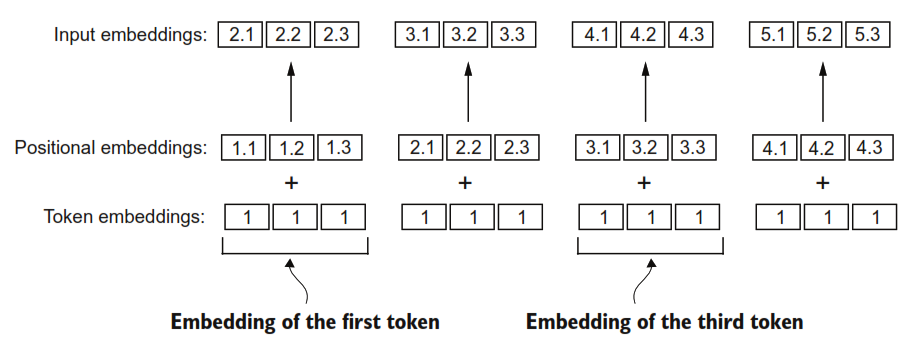


Ambos tipos de embeddings posicionales buscan aumentar la capacidad de los LLMs para comprender el orden y las relaciones entre tokens, asegurando predicciones más precisas y con mayor conciencia del contexto. La elección entre ellos depende de la aplicación específica y de la naturaleza de los datos procesados.
Los modelos GPT de OpenAI utilizan embeddings posicionales absolutos, que se optimizan durante el proceso de entrenamiento en lugar de ser fijos o predefinidos como en el modelo transformer original. Esta optimización forma parte del propio entrenamiento del modelo.


In [59]:
#token_embedding
vocab__size=50257
output_dim= 256               # 12,288 dimensiones fueron usadas en GPT-3

token_embedding_layer= torch.nn.Embedding(vocab__size, output_dim)

In [62]:
max_length= 4
dataloader= create_data_loader_v1(
    raw_text, batch_size=8, max_length=max_length,    # el lote contiene ocho muestras de texto con cuatro tokens cada una.
    stride=max_length, shuffle=False
    )
data_iter= iter(dataloader)
inputs,targets=next(data_iter)
print("Token IDs: \n", inputs)
print('-------------------------------------------------------')
print('\nInputs shape: \n', inputs.shape)
print('-------------------------------------------------------')

Token IDs: 
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
-------------------------------------------------------

Inputs shape: 
 torch.Size([8, 4])
-------------------------------------------------------


In [63]:
# uso de la capa de embedding,
token_embeddings=token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [67]:
# visulizacion de un embedding
token_embeddings[0, 0]

tensor([ 0.0215, -0.2863, -0.3913, -1.0072, -1.2006,  0.6995,  1.3829, -0.5797,
         1.7126,  0.1072, -1.9037,  1.2408, -0.8132,  0.2894,  1.3503,  0.3067,
         0.6976, -1.4106, -0.2299, -0.3694, -0.2301, -1.1996,  0.6521,  0.0168,
         1.1625,  0.8650, -0.2786, -1.2781,  0.2579, -0.2985, -1.2537, -0.1673,
        -0.4447, -0.4807, -0.3010, -0.4340,  1.5032,  0.7145,  0.0240,  0.7500,
        -1.2559,  1.5130,  1.5141,  0.2580, -2.0725, -0.6994, -1.6550,  0.0411,
        -1.4422, -0.9987,  1.2673, -2.0301, -1.8615,  0.5609, -2.7199,  0.2569,
         0.4554, -2.9761, -0.6137, -0.6679,  0.0625, -1.3717,  1.3384, -0.9441,
        -0.5499,  2.4666, -0.1231,  0.1859,  0.4798, -1.0460, -0.4586,  0.1054,
        -0.9091, -1.4975,  0.9617, -0.5981, -2.0533,  0.5889,  0.2360,  1.2207,
         1.0701,  1.0943,  0.5334,  1.2103,  0.2089,  1.1921,  2.0341, -0.4101,
        -0.7116,  1.3852,  0.2162, -0.1631, -1.0863, -0.3158,  0.4867,  1.1910,
         1.5102, -0.1251, -0.7825, -0.99

In [68]:
pos_embedding_layer.weight

NameError: name 'pos_embedding_layer' is not defined

In [69]:
#embedding posicional absoluto de un modelo GPT,
#solo necesitamos crear otra capa de
#embedding que tenga la misma dimensión que la capa token_embedding
#
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [70]:
#añadirá el tensor pos_embeddings de dimensión 4 × 256 a cada
#tensor de embedding de tokens de dimensión 4 × 256
#en cada uno de los ocho lotes.

input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)


torch.Size([8, 4, 256])


# Bonus material

#### Comparing Various Byte Pair Encoding (BPE) Implementations

In [71]:
from importlib.metadata import version

print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.12.0


In [72]:
import tiktoken

tik_tokenizer = tiktoken.get_encoding("gpt2")

text = "Hello, world. Is this-- a test?"

In [73]:
integers = tik_tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 995, 13, 1148, 428, 438, 257, 1332, 30]


In [74]:
strings = tik_tokenizer.decode(integers)
print(strings)

Hello, world. Is this-- a test?


In [75]:
print(tik_tokenizer.n_vocab)

50257


### Comprendiendo la diferencia entre capas de embedding y capas lineales

Las capas de embedding en PyTorch logran lo mismo que las capas lineales que realizan multiplicaciones matriciales; la razón por la que usamos capas de embedding es por eficiencia computacional.
Vamos a analizar esta relación paso a paso utilizando ejemplos de código en PyTorch.


In [76]:
import torch
print("PyTorch version:", torch.__version__)

PyTorch version: 2.9.0+cu126


In [77]:
# Supongamos que tenemos los siguientes 3 ejemplos de entrenamiento,
# que pueden representar IDs de tokens en el contexto de un LLM
idx = torch.tensor([2, 3, 1])

# El número de filas en la matriz de embedding se puede determinar
# obteniendo el ID de token más grande + 1.
# Si el ID de token más alto es 3, entonces queremos 4 filas, para los posibles
# IDs de token 0, 1, 2, 3
num_idx = max(idx)+1

# La dimensión deseada del embedding es un hiperparámetro
out_dim = 5


In [78]:
# Usamos una semilla aleatoria para garantizar la reproducibilidad, ya que
# los pesos en la capa de embedding se inicializan con
# pequeños valores aleatorios
torch.manual_seed(123)

embedding = torch.nn.Embedding(num_idx, out_dim)


In [79]:
embedding.weight

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  1.5810],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015],
        [ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953]], requires_grad=True)

In [80]:
#Podemos entonces usar las capas de embedding para obtener la representación vectorial de un ejemplo
#de entrenamiento con ID 1:
embedding(torch.tensor([1]))


tensor([[ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

In [81]:
# Similarmente con el ID 2
embedding(torch.tensor([2]))

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315]],
       grad_fn=<EmbeddingBackward0>)